# Appendix B: Iris data

In [1]:
#Dependencies
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import math
import pandas as pd
import seaborn as sns  ; sns.set()
np.set_printoptions(precision=10)

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dt=pd.read_csv(url,header=None,sep=',')
display(dt.head())

#easier to assign numerical values in classes
dt.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[1,2,3],inplace=True)
 
# 1. sepal length in cm 
# 2. sepal width in cm 
# 3. petal length in cm 
# 4. petal width in cm 

# -- Iris Setosa 
# -- Iris Versicolour 
# -- Iris Virginica


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dt.describe()

,0,1,2,3,4
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


#### Calculate mean for every class

In [4]:
m=np.zeros((3,4))

data = dt[[0,1,2,3]].values
cl = dt[4].values


for f in range(0,3):

    m[f][:]=np.mean(data[cl==f+1],axis=0)
    
print (m)

[[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]


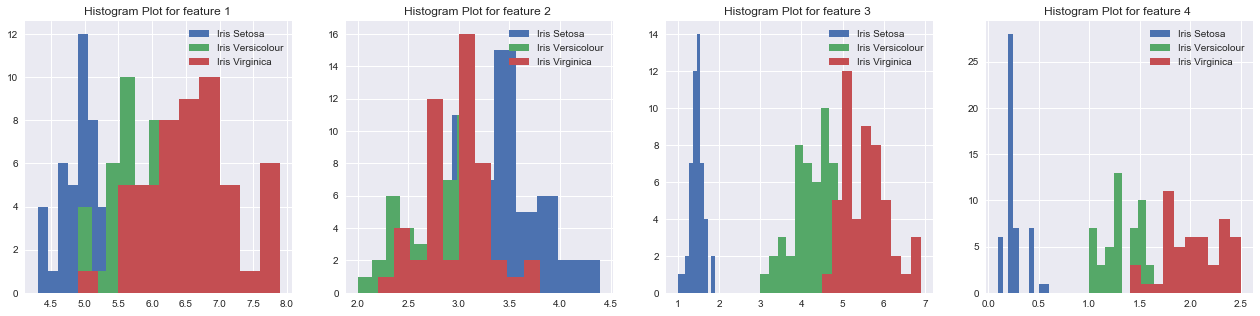

In [5]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(22,5))
for i in  range(4):
    ax[i].hist(data[:50,i],label='Iris Setosa'); 
    ax[i].hist(data[50:100,i],label='Iris Versicolour'); 
    ax[i].hist(data[100:,i],label='Iris Virginica');
    ax[i].legend(loc='upper right')
    ax[i].title.set_text('Histogram Plot for feature {} '.format(i+1))
plt.show()

#### Within class scatter matrix

In [6]:
sw=np.zeros((4,4))

len=[0]*3

for f in range(0,3):
    for d in data[cl==f+1]:
        k=np.subtract(d,m[f][:])
        sw+=np.dot(np.reshape(k,(4,1)),np.reshape(k,(1,4))) #Check for Cholesky factor in [1] reference
        len[f]+=1
print('Sw within class scatter matrix')
print (sw)

Sw within class scatter matrix
[[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


#### Overall mean of each characteristic

In [7]:
mean=np.mean(data,axis=0)
print(mean)

[5.8433333333 3.054        3.7586666667 1.1986666667]


#### Calculate between class scatter matrix

In [18]:
sb=np.zeros((4,4))

for f in range(0,3):
    sb+= np.dot(len[f],np.dot(np.reshape((m[f][:]-mean),(4,1)),np.reshape((m[f][:]-mean),(1,4))))

print('Sb between class scatter matrix')
print(np.around(sb, decimals=4))

Sb between class scatter matrix
[[ 63.2121 -19.534  165.1647  71.3631]
 [-19.534   10.9776 -56.0552 -22.4924]
 [165.1647 -56.0552 436.6437 186.9081]
 [ 71.3631 -22.4924 186.9081  80.6041]]


#### Calculating Eigenvalues and Eigenvectors

In [9]:
a=np.dot(np.linalg.inv(sw),sb)

evl,ev=np.linalg.eig(a)
ev[:,0]=-ev[:,0]
print('Eigenvectors')
print(ev)
print('')
print('Eigenvalues')
print(evl)

Eigenvectors
[[-0.2049097595 -0.0089823402 -0.614482036   0.401876233 ]
 [-0.3871433107 -0.5889985712 -0.0389005142 -0.4337515393]
 [ 0.5464821787  0.2542865458 -0.1067469201 -0.483862526 ]
 [ 0.7137851748 -0.7670321723  0.7807071618  0.6451605625]]

Eigenvalues
[ 3.2271957800e+01  2.7756686384e-01 -5.1456301582e-15  4.4202492535e-15]


#### Create a new eigenvector using the significant eigenvalues

In [10]:
w=np.zeros((4,2))
evl_s=sum(np.absolute(evl))
n=0
#print(evl_s)

for f in range(0,4):
    evl_p=np.absolute(evl[f]/evl_s)*100
    #print(evl_p)
    if evl_p > 0.01:
        w[:,n]=ev[:,f]
        n+=1

print('W using significant eigenvecotrs')
print(w)


W using significant eigenvecotrs
[[-0.2049097595 -0.0089823402]
 [-0.3871433107 -0.5889985712]
 [ 0.5464821787  0.2542865458]
 [ 0.7137851748 -0.7670321723]]


#### Apply w to dataset

In [11]:
data_w=np.dot(data,w)
print(data_w[:5,:])

[[-1.4922092757 -1.9047102046]
 [-1.2576556684 -1.6084144509]
 [-1.3487505965 -1.7498463517]
 [-1.1802488538 -1.6391909514]
 [-1.5104326308 -1.9627118276]]


#### Plot the generated data from w

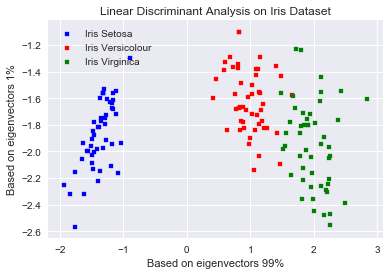

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

len0=len[0]-1
len1=len0+len[1]
len2=len1+len[2]
#print(len0,len1,len2)

ax.scatter(data_w[0:len0,0],data_w[0:len0,1], s=10, c='b', marker="s", label='Iris Setosa')
ax.scatter(data_w[len0+1:len1,0],data_w[len0+1:len1,1], s=10, c='r', marker="s", label='Iris Versicolour')
ax.scatter(data_w[len1+1:len2,0],data_w[len1+1:len2,1], s=10, c='g', marker="s", label='Iris Virginica')
ax.legend(loc='upper left')

plt.title('Linear Discriminant Analysis on Iris Dataset')
plt.xlabel('Based on eigenvectors 99%')
plt.ylabel('Based on eigenvectors 1%')
plt.show()

#### Compare the seperationa achieved between the different eigenvalues sizes

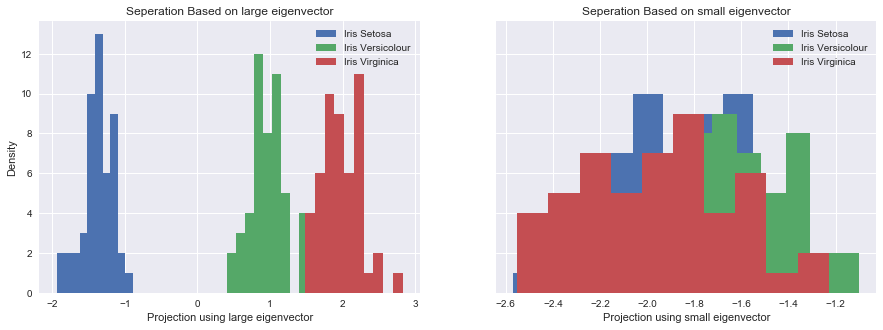

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,5), sharey=True)


ax[0].hist(data_w[:len0+1,0],label='Iris Setosa');
ax[0].hist(data_w[len0+1:len1+1,0],label='Iris Versicolour');
ax[0].hist(data_w[len1+1:,0],label='Iris Virginica');
ax[0].legend(loc='upper right')

ax[1].hist(data_w[:len0+1,1],label='Iris Setosa');
ax[1].hist(data_w[len0+1:len1+1,1],label='Iris Versicolour');
ax[1].hist(data_w[len1+1:,1],label='Iris Virginica');
ax[1].legend(loc='upper right')
ax[0].set_ylabel('Density')
ax[0].title.set_text('Seperation Based on large eigenvector')
ax[1].title.set_text('Seperation Based on small eigenvector')
ax[0].set_xlabel('Projection using large eigenvector')
ax[1].set_xlabel('Projection using small eigenvector')
plt.show()


#### Question 3.3: different vector w = w* + a

In [14]:
w_n=w+ev[:,2:4]
print(w_n)

[[-0.8193917955  0.3928938928]
 [-0.4260438249 -1.0227501105]
 [ 0.4397352586 -0.2295759802]
 [ 1.4944923366 -0.1218716098]]


In [15]:
data_wn=np.dot(data,w_n)
print(data_w[:5,:])

[[-1.4922092757 -1.9047102046]
 [-1.2576556684 -1.6084144509]
 [-1.3487505965 -1.7498463517]
 [-1.1802488538 -1.6391909514]
 [-1.5104326308 -1.9627118276]]


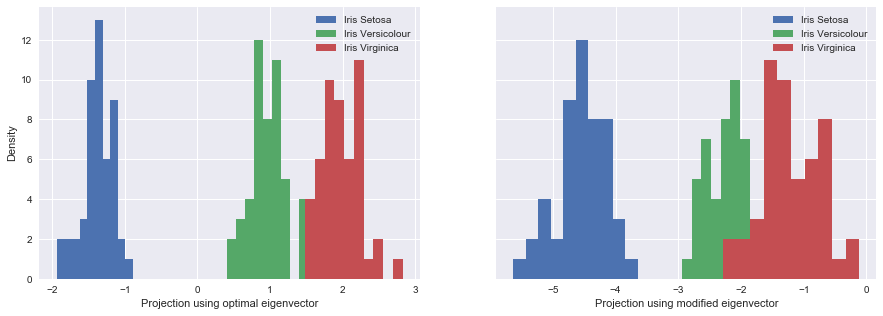

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,5), sharey=True)


ax[1].hist(data_wn[:len0+1,0],label='Iris Setosa');
ax[1].hist(data_wn[len0+1:len1+1,0],label='Iris Versicolour');
ax[1].hist(data_wn[len1+1:,0],label='Iris Virginica');
ax[1].legend(loc='upper right')

ax[0].hist(data_w[:len0+1,0],label='Iris Setosa');
ax[0].hist(data_w[len0+1:len1+1,0],label='Iris Versicolour');
ax[0].hist(data_w[len1+1:,0],label='Iris Virginica');
ax[0].legend(loc='upper right')
ax[0].set_ylabel('Density')
ax[0].set_xlabel('Projection using optimal eigenvector')
ax[1].set_xlabel('Projection using modified eigenvector')
plt.show()
